In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from tslearn.datasets import CachedDatasets, UCR_UEA_datasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

import pmdarima as pm
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
# データセット可視化メソッド
def plot_data(X_train, y_train, name):
    plt.figure(figsize=(12,5))

    # true
    # plt.subplot(1, 2, 1)
    label = np.unique(y_train)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_train == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}', color=colors[class_label - 1], alpha=0.3)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{name}')

    plt.tight_layout()
    plt.show()

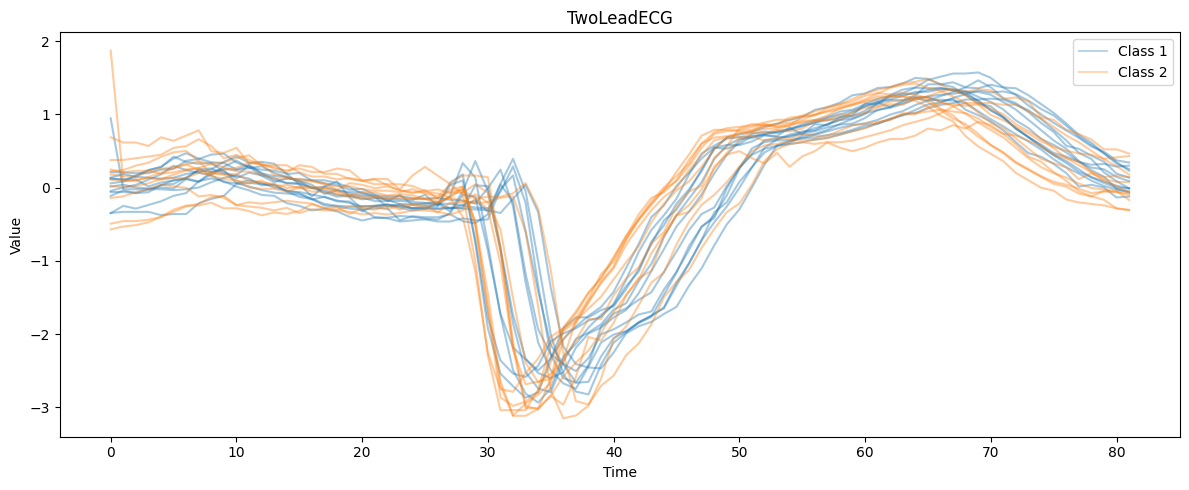

In [3]:
data_name = 'TwoLeadECG'

# データセットの読み込み（ここではUCR/UEAデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(data_name)

plot_data(X_train, y_train, data_name)

In [10]:
# 階差の次数の検討
print('d =', arima.ndiffs(X_train[0]))      #d

d = 0


In [7]:
X_train.shape

(23, 82, 1)

モデルの自動学習

In [9]:
# モデル構築（Auto ARIMA）
arima_model = pm.auto_arima(X_train[0], 
                            seasonal=False,
                            trace=True,
                            n_jobs=-1,
                            maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-21.588, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=233.700, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=13.991, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=135.430, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-20.796, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-21.595, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-19.909, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-20.087, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-20.302, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-19.605, Time=0.01 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-19.349, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-19.636, Time=0.01 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 0.112 seconds


/Users/tomokazu/miniforge3/envs/py310/lib/python3.10/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


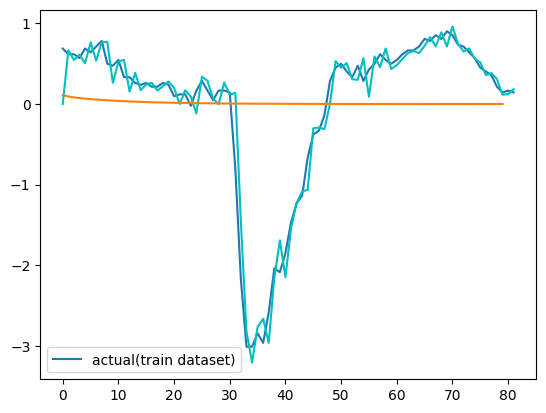

In [41]:
# 予測
##学習データの期間の予測値
train_pred = arima_model.predict_in_sample()
sample = arima_model.predict(n_periods=80)


# グラフ化
fig, ax = plt.subplots()
ax.plot(X_train[0], label="actual(train dataset)")
# ax.plot(df_test.index, df_test.values, label="actual(test dataset)", color="gray")
ax.plot(train_pred, color="c")
ax.plot(sample, )
# ax.plot(df_test.index, test_pred, label="auto ARIMA", color="c") 
# ax.fill_between(
#     df_test.index,
#     test_pred_ci[:, 0],
#     test_pred_ci[:, 1],
#     color='c',
#     alpha=.2)
ax.legend()

モデルフィッティングとしてはほとんど意味が無い

学習したパラメータの取得

In [32]:
arima_model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (2, 0, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [34]:
arima_model.arparams()

array([ 1.28632167, -0.34142383])

In [33]:
arima_model.maparams()

array([0.4076181])

In [47]:
# モデル構築（Auto ARIMA）
arima_model = pm.auto_arima(X_train[3], 
                            seasonal=False,
                            trace=True,
                            n_jobs=-1,
                            maxiter=10)

print(arima_model.arparams())
print(arima_model.maparams())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-109.401, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-40.401, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-101.030, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-97.367, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-42.247, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-113.886, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-114.382, Time=0.01 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-111.268, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-114.766, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-113.396, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-111.829, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-116.739, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-99.205, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-102.981, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0]             :

/Users/tomokazu/miniforge3/envs/py310/lib/python3.10/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
